In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt
import nltk

In [17]:
from nltk.util import ngrams, bigrams, trigrams
from nltk.tokenize import word_tokenize,sent_tokenize

In [2]:
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))

In [4]:
print(dataset.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [5]:
documents=dataset.data
print("# of Documents",len(documents))
print("Categories",dataset.target_names)

# of Documents 11314
Categories ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [6]:
news_df=pd.DataFrame({'document':documents})
print(news_df.head)

<bound method NDFrame.head of                                                 document
0      Well i'm not sure about the story nad it did s...
1      \n\n\n\n\n\n\nYeah, do you expect people to re...
2      Although I realize that principle is not one o...
3      Notwithstanding all the legitimate fuss about ...
4      Well, I will have to change the scoring on my ...
...                                                  ...
11309  Danny Rubenstein, an Israeli journalist, will ...
11310                                                 \n
11311  \nI agree.  Home runs off Clemens are always m...
11312  I used HP DeskJet with Orange Micros Grappler ...
11313                                        ^^^^^^\n...

[11314 rows x 1 columns]>


In [19]:
news_df['bigrams']  = news_df['document'].map(lambda x : list(bigrams(word_tokenize(x))))
print(news_df['bigrams'])

0        [(Well, i), (i, 'm), ('m, not), (not, sure), (...
1        [(Yeah, ,), (,, do), (do, you), (you, expect),...
2        [(Although, I), (I, realize), (realize, that),...
3        [(Notwithstanding, all), (all, the), (the, leg...
4        [(Well, ,), (,, I), (I, will), (will, have), (...
                               ...                        
11309    [(Danny, Rubenstein), (Rubenstein, ,), (,, an)...
11310                                                   []
11311    [(I, agree), (agree, .), (., Home), (Home, run...
11312    [(I, used), (used, HP), (HP, DeskJet), (DeskJe...
11313    [(^^^^^^, No), (No, argument), (argument, at),...
Name: bigrams, Length: 11314, dtype: object


0        171
1        122
2        136
3        200
4         80
        ... 
11309     51
11310      0
11311     23
11312     57
11313    296
Name: bigrams_len, Length: 11314, dtype: int64
0
35954


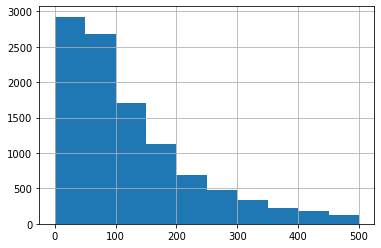

In [27]:
#Bigram Hist
news_df['bigrams_len']=news_df.bigrams.apply(len)
print(news_df['bigrams_len'])
news_df['bigrams_len'].hist(range = (0,500))
print(news_df['bigrams_len'].min())
print(news_df['bigrams_len'].max())

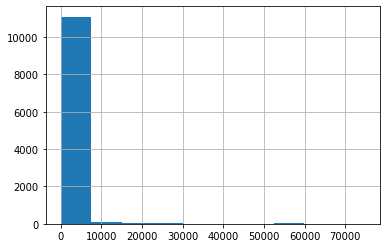

In [9]:
#Average word length in each sentence

new=news_df['document'].str.len().hist()
# new=new.values.tolist()
# corpus=[word for i in new for word in i]
# print(corpus)

In [16]:
print(news_df.iloc[0]['document'])
print(len(news_df.iloc[0]['document'].split()))

Well i'm not sure about the story nad it did seem biased. What
I disagree with is your statement that the U.S. Media is out to
ruin Israels reputation. That is rediculous. The U.S. media is
the most pro-israeli media in the world. Having lived in Europe
I realize that incidences such as the one described in the
letter have occured. The U.S. media as a whole seem to try to
ignore them. The U.S. is subsidizing Israels existance and the
Europeans are not (at least not to the same degree). So I think
that might be a reason they report more clearly on the
atrocities.
	What is a shame is that in Austria, daily reports of
the inhuman acts commited by Israeli soldiers and the blessing
received from the Government makes some of the Holocaust guilt
go away. After all, look how the Jews are treating other races
when they got power. It is unfortunate.

156


In [ ]:
from nltk.util import ngrams